In [1]:
from glob import glob
import numpy as np
import cv2
from gi.repository import Vips
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def imshow(img):
    if len(img.shape) == 2 or img.shape[2] == 1:
        img = np.dstack([img, img, img])
    plt.imshow(img)
    plt.show()

In [3]:
def read_vips(filename):
    return Vips.Image.new_from_file(filename)

def extract_gray(image, offset_x, offset_y, size_x=256, size_y=256):
    subimage = image.extract_area(offset_x, offset_y, size_x, size_y)
    mat = np.fromstring(subimage.write_to_memory()).view(np.int16)
    return np.uint8(mat.reshape(size_y, size_x) / 8)

def extract_rgb(image, offset_x, offset_y, size_x=256, size_y=256):
    subimage = image.extract_area(offset_x, offset_y, size_x, size_y)
    channels = [4, 2, 1]
    mat = np.fromstring(subimage.write_to_memory()).view(np.int16)
    return np.uint8(mat.reshape(size_y, size_x, 8) / 8)[:, :, channels]
    

['./data/rgb/14OCT06063658-M2AS_R1C1-053950035020_01_P001.TIF', './data/rgb/14OCT06063756-M2AS_R1C1-053950035020_01_P001.TIF']


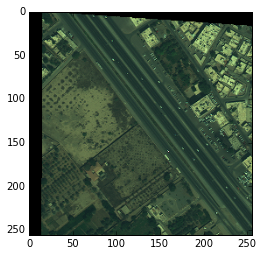

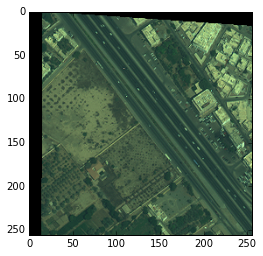

True

In [4]:
dir_path = "./data/rgb/"
files = sorted(glob(dir_path + '*.TIF'))
print(files)

img0_vips = read_vips(files[0])
img1_vips = read_vips(files[1])
tile0 = extract_rgb(img0_vips, 0, 0)
tile1 = extract_rgb(img1_vips, 0, 0)
imshow(tile0)
imshow(tile1)

cv2.imwrite(dir_path + "/0.png", tile0)
cv2.imwrite(dir_path + "/1.png", tile1)